In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
import os

from scipy.interpolate import make_interp_spline
import rpy2.robjects as robjects
import pyreadr
import matplotlib.cm as cm
color_map  = cm.get_cmap('tab20c')

from collections import defaultdict


In [2]:
def remove_outlier(data_list, a=2):
    mean = np.mean(data_list)
    std = np.std(data_list)
    keep = np.intersect1d(np.where(data_list <= mean + a*std)[0], np.where(data_list >= mean - a*std)[0])
    keep = np.array(keep)

    out = [data_list[x] for x in keep]
    return out

In [3]:
def load_data(type,rate,path,p, N_list, alpha):
    listKeys = ['maxAnorm', 'maxBnorm', 'maxAnorm_nor', 'maxBnorm_nor', 'avgAnorm_nor', 'avgBnorm_nor','avgAnorm', 'avgBnorm', 'iniAnorm', 'iniAnorm_nor']
    data_N = {}
    for n in N_list:
        data_N[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p{}__alpha{}_rate{}_ss{}_ss_run2_res.csv".format(type,p,alpha, rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['maxBnorm'].append(min(B))

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['iniAnorm'].append(Am[0])

                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['iniAnorm_nor'].append(Am[0])


                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['avgBnorm_nor'].append(min(B))

                A_norm = row['avgAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['N'])]['avgAnorm'].append(min(Am))

                B_norm = row['avgBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['N'])]['avgBnorm'].append(min(B))


    """

    data_R = {}
    for n in [5, 10, 50, 100,150,200,250,300,350,400, 500, 1000, 5000, 10000]:
        data_R[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p100__rate{}_ss{}_random_run2_res.csv".format(type,rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['maxBnorm'].append(min(B))



                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_R[int(row['N'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_R[int(row['N'])]['avgBnorm_nor'].append(min(B))


    """

    return data_N

In [4]:
def print_data(type,rate,path,p, alpha):
    data_N = {}

    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        file_path = path+"model3_{}_p{}__alpha{}_rate{}_ss{}_ss_run2_res.csv".format(type,p,alpha, rate, i)
        print('cp {} ../../output/output_sample_batch/'.format(file_path))
            

In [5]:
N50 =  [275, 305, 344, 393, 458, 550, 688, 917, 1376, 2752, 13761]
N100 = [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240,16200]
N150 = [352, 391, 440, 503, 587, 705, 881, 1175, 1762, 3525, 17626]

import numpy as np

In [6]:

data50_N2 = []
data50_N1 = []
data50_N3 = []
for i in range(1,10,1):
    type='tridiag2'
    rate=242
    path  = "../../../output/output_sample_batch/"
    p = 50
    data50_N2.append(load_data(type,rate,path, p, N50,i))


    type='tridiag3'
    rate=242
    p = 50
    data50_N3.append(load_data(type,rate,path, p, N50,i))


    type='tridiag1'
    rate=142
    p = 50
    data50_N1.append(load_data(type,rate,path, p, N50,i))




In [7]:
N50 =  [344, 458, 688, 1376, 2752, 13761]


Text(0, 0.5, '$\\max_{m,i}\\; \\|{A}^m-A^{m\\star}\\|_F^2+\\|{B}_i-B_i^\\star\\|_F^2$')

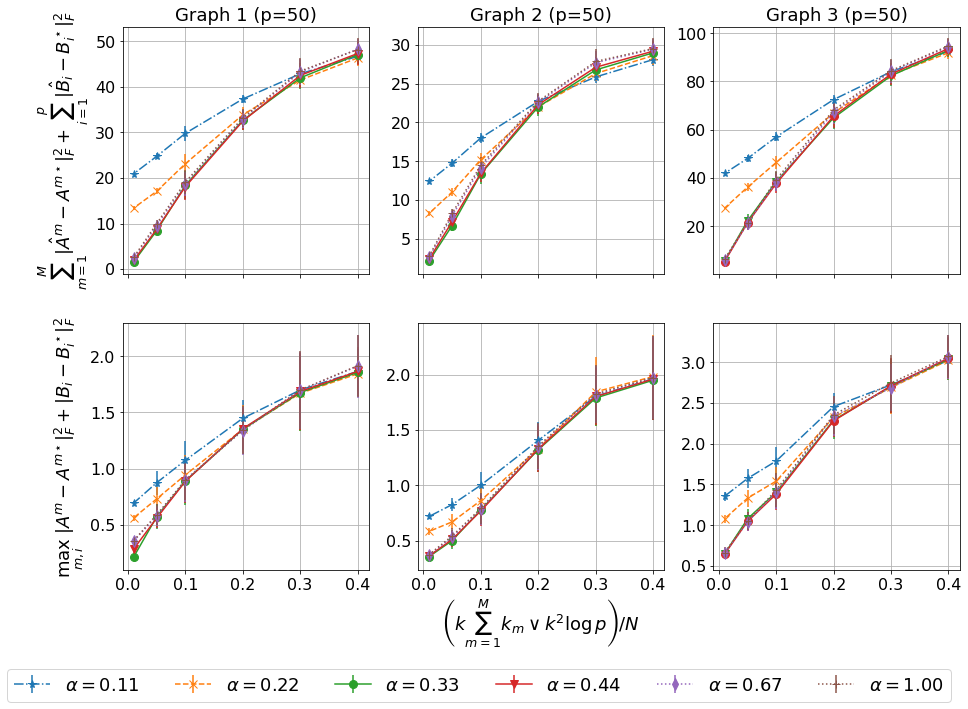

In [8]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
m_size=7.5
fig, ax = plt.subplots(2, 3,sharex=True, figsize=(15,10))

x_label = [(81*np.log10(50)/n) for n in N50]

count = 0
fmt_list = ['-.*', '--x','-v', ':d',':+']
for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N1[i][n]['avgBnorm'],data50_N1[i][n]['avgAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
    if i == 2:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[0,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8, label=r'$\alpha=%.2f$'%((i+1)/9))

ax[0,0].grid()
#ax[0,0].legend()

count = 0

for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N1[i][n]['maxBnorm'],data50_N1[i][n]['maxAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
    if i == 2:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[1,0].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8, label=r'$\alpha=%.2f$'%((i+1)/9))

ax[1,0].grid()
#ax[1,0].legend()



count = 0
for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N2[i][n]['avgBnorm'],data50_N2[i][n]['avgAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
        
    
    if i == 2:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[0,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8,label=r'$\alpha=%.2f$'%((i+1)/9))
   

ax[0,1].grid()
#ax[0,1].legend()
count = 0

for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N2[i][n]['maxBnorm'],data50_N2[i][n]['maxAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
        
    
    if i == 2:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[1,1].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8,label=r'$\alpha=%.2f$'%((i+1)/9))
   

ax[1,1].grid()
#ax[1,1].legend()
count = 0

for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N3[i][n]['avgBnorm'],data50_N3[i][n]['avgAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
    if i == 3:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[0,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8, label=r'$\alpha=%.2f$'%((i+1)/9))
   
ax[0,2].grid()
#ax[0,2].legend()

count = 0

for i in [0,1,2,3,5,8]:
    b_mean = []
    b_std = []
    for n in N50:
        datazip = zip(data50_N3[i][n]['maxBnorm'],data50_N3[i][n]['maxAnorm'])
        AplusB = [x+y for x,y in datazip]
        #print(AplusB)
        b_mean.append(np.mean(remove_outlier((AplusB), 2)))
        b_std.append(np.std(remove_outlier((AplusB), 2)))
    if i == 3:
        fmt = '-o'
    else:
        
        fmt = fmt_list[count]
        count += 1
    ax[1,2].errorbar(x=x_label, y=b_mean, yerr=b_std, fmt=fmt,markersize=8, label=r'$\alpha=%.2f$'%((i+1)/9))
   
ax[1,2].grid()
#ax[1,2].legend()


#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0,0].set_title('Graph 1 (p=50)', fontsize=18)
ax[0,1].set_title('Graph 2 (p=50)', fontsize=18)
ax[0,2].set_title('Graph 3 (p=50)', fontsize=18)


handles, labels = ax[0,1].get_legend_handles_labels()

ax[1,1].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$', fontsize=18)
#ax[0,2].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')

#plt.savefig('all_ss_org_p150_1-3.png', bbox_inches='tight')
fig.legend(handles, labels, ncol=6, bbox_to_anchor=(.9, -0.0), prop={'size': 18})
#fig.tight_layout()
#plt.tight_layout()#
#fig.savefig('all_ss_org.png', bbox_inches='tight')
#fig.savefig('all_ss_org.pdf', bbox_inches='tight')
ax[0,0].set_ylabel(r'$\sum_{m=1}^M\|\hat{A}^m-A^{m\star}\|_F^2+\sum_{i=1}^p\|\hat{B}_i-B_i^\star\|_F^2$', fontsize=18)
ax[1,0].set_ylabel(r'$\max_{m,i}\; \|{A}^m-A^{m\star}\|_F^2+\|{B}_i-B_i^\star\|_F^2$', fontsize=18)
#plt.savefig('sample_complexity_alpha.pdf', bbox_inches='tight')

In [9]:
def load_data(type,rate,path,p, N, alpha):
    listKeys = ['maxAnorm', 'maxBnorm', 'maxAnorm_nor', 'maxBnorm_nor', 'avgAnorm_nor', 'avgBnorm_nor','avgAnorm', 'avgBnorm', 'iniAnorm', 'iniAnorm_nor']
    data_N = {}
    for n in [3,5,7,9,15]:
        data_N[n] = {key:[] for key in listKeys}
    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        with open(path+"model3_{}_p{}_N{}_alpha{}_rate{}_ss{}_ss_varyk_run2_res.csv".format(type,p,N,alpha, rate, i), newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                #print('N:',row['N'])

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['maxAnorm'].append(min(Am))

                B_norm = row['maxBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['k'])]['maxBnorm'].append(min(B))

                A_norm = row['maxAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['iniAnorm'].append(Am[0])

                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['iniAnorm_nor'].append(Am[0])


                A_norm = row['maxAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['maxAnorm_nor'].append(min(Am))

                B_norm = row['maxBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['k'])]['maxBnorm_nor'].append(min(B))


                A_norm = row['avgAnorm_nor'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['avgAnorm_nor'].append(min(Am))

                B_norm = row['avgBnorm_nor'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['k'])]['avgBnorm_nor'].append(min(B))

                A_norm = row['avgAnorm'][1:-1].split(',')
                Am = [float(x) for x in A_norm]
                data_N[int(row['k'])]['avgAnorm'].append(min(Am))

                B_norm = row['avgBnorm'][1:-1].split(',')
                B = [float(x) for x in B_norm]
                data_N[int(row['k'])]['avgBnorm'].append(min(B))


    return data_N

In [10]:
def print_data(type,rate,path, p,N, alpha):
    data_N = {}

    #print(data_N)
    id = np.arange(20)+1
    for i in id:
        file_path = path+"model3_{}_p{}_N{}_alpha{}_rate{}_ss{}_ss_varyk_run2_res.csv".format(type,p,N,alpha, rate, i)
        print('cp {} ../../output/output_sample_batch/'.format(file_path))
            

In [11]:

type='tridiag2'
rate=242
path  = "../../../output/output_sample_batch/"
p = 100
data100_N2 = load_data(type,rate,path, p, 324,3)


type='tridiag3'
rate=142
p = 100
data100_N3 = load_data(type,rate,path, p, 324,3)


type='tridiag1'
rate=142
p = 100
data100_N1 = load_data(type,rate,path, p, 324,3)



type='tridiag2'
rate=242
p = 50
data50_N2 = load_data(type,rate,path, p, 324,3)


type='tridiag3'
rate=242
p = 50
data50_N3 = load_data(type,rate,path, p, 324,7)


type='tridiag1'
rate=142
p = 50
data50_N1 = load_data(type,rate,path, p, 324,3)




type='tridiag2'
rate=242
p = 150
data150_N2 = load_data(type,rate,path, p, 289,3)


type='tridiag3'
rate=242
p = 150
data150_N3 = load_data(type,rate,path, p, 289,7)


type='tridiag1'
rate=142
p = 150
data150_N1 = load_data(type,rate,path, p, 289,3)




Text(0.5, 1.0, 'Maximum Distance (p=150)')

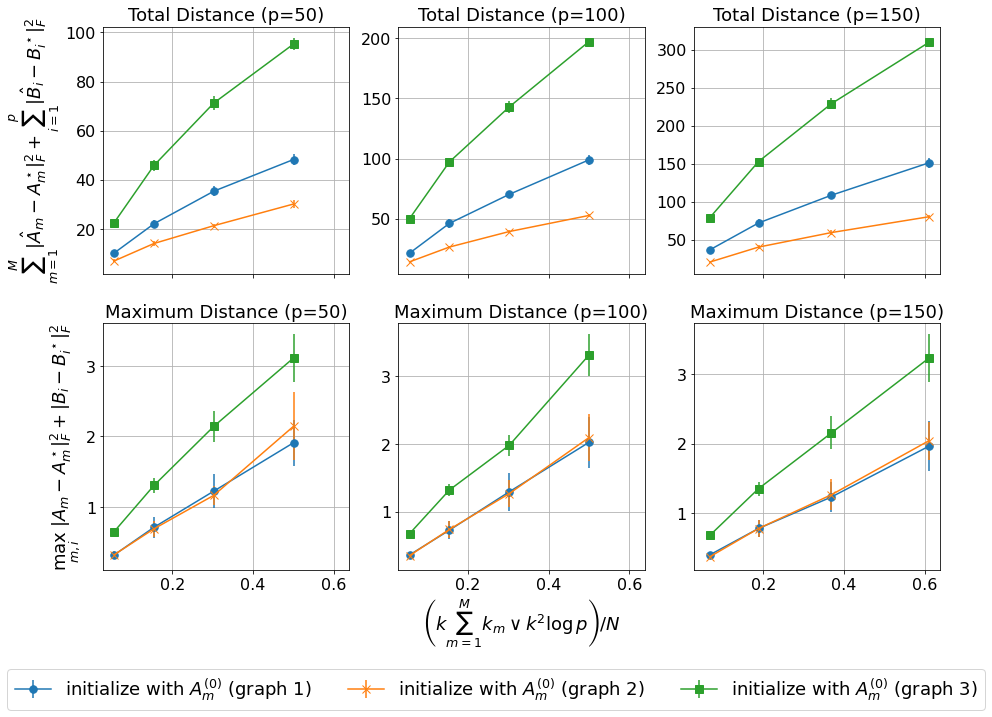

In [12]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
m_size=7.5
fig, ax = plt.subplots(2, 3,sharex=True, figsize=(15,10))
k100 = [3, 5, 7, 9]
k50  = [3, 5, 7, 9]
k150 = [3, 5, 7, 9]
x50_label = [((k**2)*2/324) for k in k50]
x100_label = [((k**2)*np.log10(100)/324) for k in k100]
x150_label = [((k**2)*np.log10(150)/289) for k in k100]


b_mean = []
b_std = []
for k in k50:
    datazip = zip(data50_N1[k]['avgBnorm'],data50_N1[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[0,0].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k50:
    datazip = zip(data50_N1[k]['maxBnorm'],data50_N1[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[1,0].grid()
#ax[1,0].legend()
b_mean = []
b_std = []

for k in k50:
    datazip = zip(data50_N2[k]['avgBnorm'],data50_N2[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[0,0].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k50:
    datazip = zip(data50_N2[k]['maxBnorm'],data50_N2[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[1,0].grid()

b_mean = []
b_std = []

for k in k50:
    datazip = zip(data50_N3[k]['avgBnorm'],data50_N3[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[0,0].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k50:
    datazip = zip(data50_N3[k]['maxBnorm'],data50_N3[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,0].errorbar(x=x50_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[1,0].grid()


############ p = 100

b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N1[k]['avgBnorm'],data100_N1[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,1].errorbar(x=x100_label, y=b_mean, yerr=b_std,fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[0,1].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N1[k]['maxBnorm'],data100_N1[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,1].errorbar(x=x100_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[1,1].grid()



b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N2[k]['avgBnorm'],data100_N2[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,1].errorbar(x=x100_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[0,1].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N2[k]['maxBnorm'],data100_N2[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,1].errorbar(x=x100_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[1,1].grid()


b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N3[k]['avgBnorm'],data100_N3[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,1].errorbar(x=x100_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[0,1].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k100:
    datazip = zip(data100_N3[k]['maxBnorm'],data100_N3[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,1].errorbar(x=x100_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[1,1].grid()

##### p=150


b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N1[k]['avgBnorm'],data150_N1[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[0,2].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N1[k]['maxBnorm'],data150_N1[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-o',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 1)')

ax[1,2].grid()



b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N2[k]['avgBnorm'],data150_N2[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[0,2].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N2[k]['maxBnorm'],data150_N2[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))
if i == 2:
    fmt = '-o'
else:
    
    fmt = fmt_list[count]
    count += 1
ax[1,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-x',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 2)')

ax[1,2].grid()



b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N3[k]['avgBnorm'],data150_N3[k]['avgAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[0,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[0,2].grid()
#ax[0,0].legend()

count = 0


b_mean = []
b_std = []
for k in k150:
    datazip = zip(data150_N3[k]['maxBnorm'],data150_N3[k]['maxAnorm'])
    AplusB = [x+y for x,y in datazip]
    #print(AplusB)
    b_mean.append(np.mean(remove_outlier((AplusB), 2)))
    b_std.append(np.std(remove_outlier((AplusB), 2)))

ax[1,2].errorbar(x=x150_label, y=b_mean, yerr=b_std, fmt='-s',markersize=m_size, label=r'initialize with $A_m^{(0)}$ (graph 3)')

ax[1,2].grid()

handles, labels = ax[0,1].get_legend_handles_labels()

ax[1,1].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$', fontsize=18)
#ax[0,2].set_xlabel(r'$\left(k\sum_{m=1}^M k_m\vee k^2 \log p\right)/N$')

#plt.savefig('all_ss_org_p150_1-3.png', bbox_inches='tight')
fig.legend(handles, labels, ncol=6, bbox_to_anchor=(.95, -0.0), prop={'size': 18})
#fig.tight_layout()
#plt.tight_layout()#
#fig.savefig('all_ss_org.png', bbox_inches='tight')
#fig.savefig('all_ss_org.pdf', bbox_inches='tight')
ax[0,0].set_ylabel(r'$\sum_{m=1}^M\|\hat{A}_m-A_m^\star\|_F^2+\sum_{i=1}^p\|\hat{B}_i-B_i^\star\|_F^2$', fontsize=18)
ax[1,0].set_ylabel(r'$\max_{m,i}\; \|{A}_m-A_m^\star\|_F^2+\|{B}_i-B_i^\star\|_F^2$', fontsize=18)

ax[0,0].set_title('Total Distance (p=50)', fontsize=18)
ax[0,1].set_title('Total Distance (p=100)', fontsize=18)
ax[0,2].set_title('Total Distance (p=150)', fontsize=18)


ax[1,0].set_title('Maximum Distance (p=50)', fontsize=18)
ax[1,1].set_title('Maximum Distance (p=100)', fontsize=18)
ax[1,2].set_title('Maximum Distance (p=150)', fontsize=18)

#plt.savefig('sample_complexity_varyk.pdf', bbox_inches='tight')